In [1]:
import sys

sys.path.insert(1, '../../src')

from ce.tsp_optimized import create_tsp as create_tsp_np
from ce.tsp import create_tsp
from ce.algorithms.greedy_regret_heuristics import *
from ce.algorithms.greedy_heuristics import *
from ce.utils.plot import quality_plots
from ce.utils.experiments import experiment, run_all_experiments
import random
from ce.algorithms.greedy_regret_heuristics.greedy_cycle_with_regret import greedy_cycle_with_regret
from ce.algorithms.greedy_regret_heuristics.greedy_cycle_with_weighted_regret import greedy_cycle_with_weighted_regret

random.seed(13)

# Greedy heuristics with regret

**Nina Zukowska 148278, Antoni Solarski 148270**

In [2]:
problem_instance_A_path = '../../data/TSPA.csv'
problem_instance_B_path = '../../data/TSPB.csv'
problem_instance_C_path = '../../data/TSPC.csv'
problem_instance_D_path = '../../data/TSPD.csv'

In [3]:
tspa_np, tspb_np, tspc_np, tspd_np = create_tsp_np(problem_instance_A_path), create_tsp_np(problem_instance_B_path), create_tsp_np(problem_instance_C_path), create_tsp_np(problem_instance_D_path)
tspa, tspb, tspc, tspd = create_tsp(problem_instance_A_path), create_tsp(problem_instance_B_path), create_tsp(problem_instance_C_path), create_tsp(problem_instance_D_path)

### Greedy with regret
Greedily acquires new nodes by the value of 'regret'.
Here is the pseudocode:
```
function get_2_regret(edges, tsp, node_index):
    Calculate changes in objective function for node insertion between diferent nodes

function extend_cycle(cycle, tsp):
    Extend the cycle by adding the node with the maximum regret

function greedy_cycle_with_regret(tsp, start_node):
    Initialize the solution with the start node
    While the solution length is less than desired:
        Extend the solution using the node with max regret
    Return the solution
```

For the sake of this algorithm the previous code was adjusted in order to avoid long running times

In [4]:
debug = []

In [5]:
%%time
solution = greedy_cycle_with_regret(tspa_np, 0, debug)

Wall time: 697 ms


In [6]:
tspa.get_solution_cost(solution)

120639

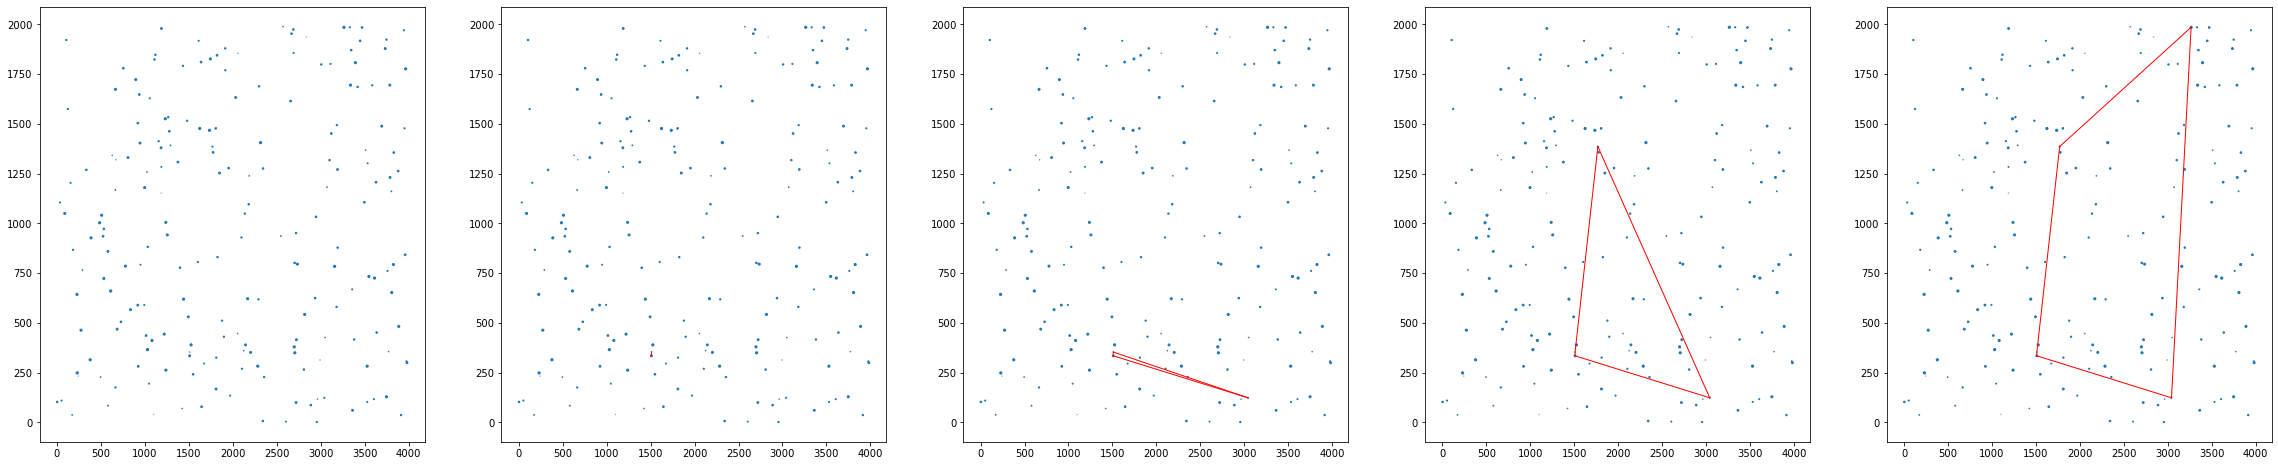

In [7]:
tspa_np.plot(debug[0:5])

In [8]:
%%time
print("Greedy with regret")
regret_results, regret_best = experiment(200, lambda x: greedy_cycle_with_regret(tspa_np, x), lambda x: tspa.get_solution_cost(x))

Greedy with regret
MIN 109133, AVG 116804.52, MAX 125728
Wall time: 2min 9s


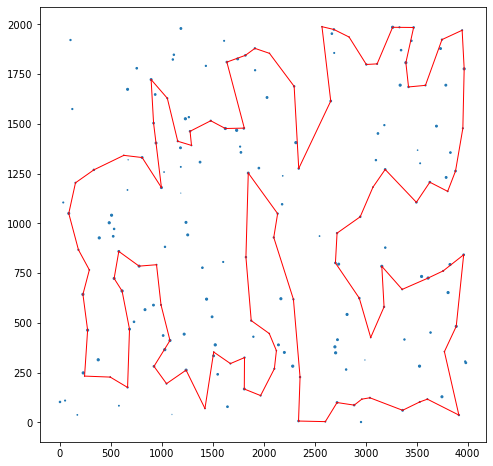

In [9]:
tspa.plot([regret_best])

### Greedy with weighted regret
A differnt heuristic for the TSP problem weighting regret with the cost of the node in the final solution. Here is the pseudocode: 
```
function get_2_regret_weighted(edges, tsp, node_index):
    Calculate differences for various node insertions, with the cost of the node subtracted

function extend_cycle(cycle, tsp):
    Extend the cycle by adding the node with the maximum weighted regret

function greedy_cycle_with_weighted_regret(tsp, start_node):
    Initialize the solution with the start node
    While the solution length is less than desired:
        Extend the solution using the node with max weighted regret
    Return the solution```

In [10]:
debug = []

In [11]:
%%time
solution = greedy_cycle_with_weighted_regret(tspa_np, 0, debug)

Wall time: 651 ms


In [12]:
tspa.get_solution_cost(solution)

75602

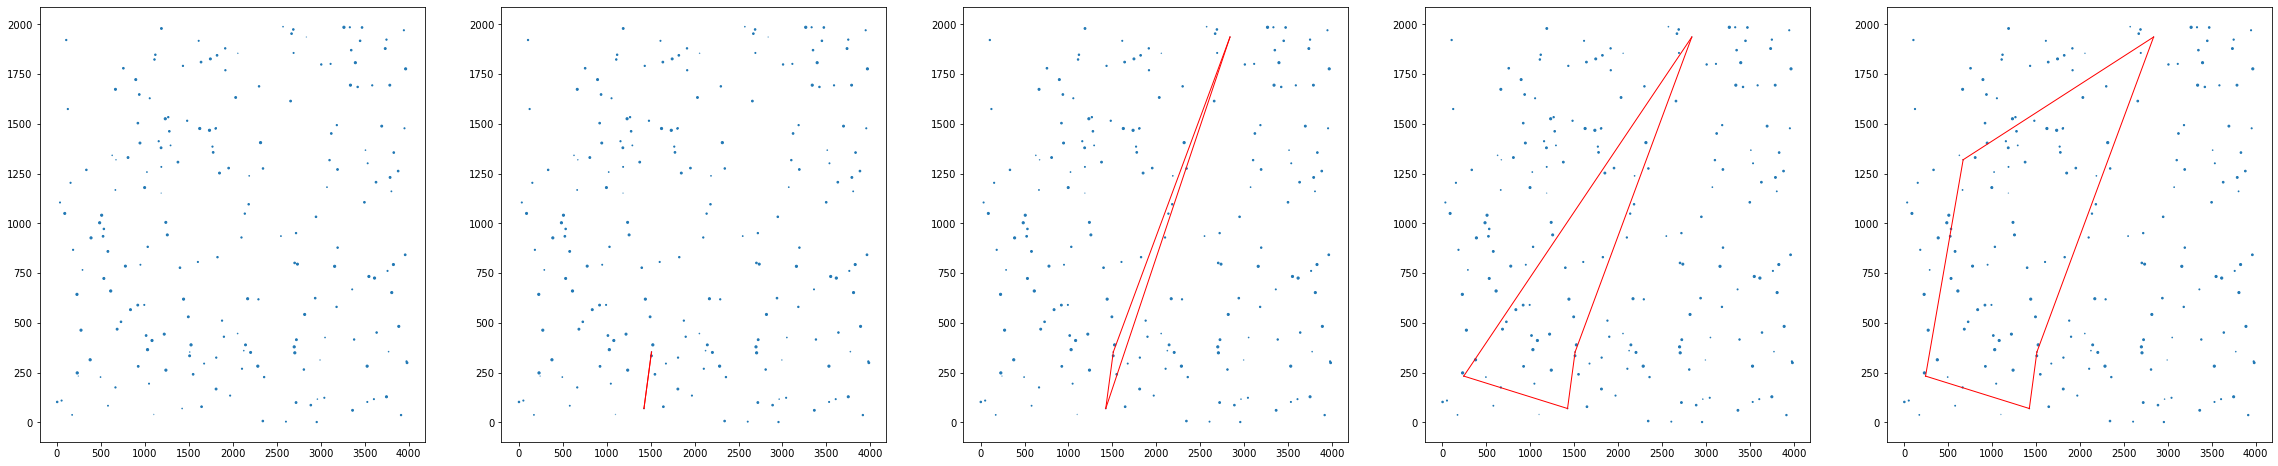

In [13]:
tspa.plot(debug[0:5])

In [14]:
%%time
print("Greedy with weighted regret")
regret_weighted_results, regret_weighted_best = experiment(200, lambda x: greedy_cycle_with_weighted_regret(tspa_np, x), lambda x: tspa.get_solution_cost(x))

Greedy with weighted regret
MIN 74606, AVG 75943.78, MAX 77172
Wall time: 2min


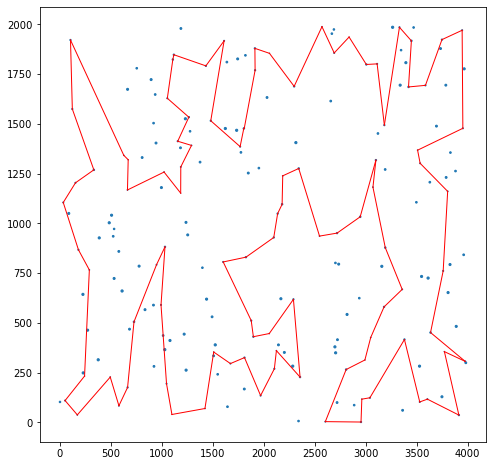

In [15]:
tspa.plot([regret_weighted_best])

# Instance A

Running Random
MIN 236587, AVG 264935.945, MAX 290340
Running Nearest Neighbor
MIN 110035, AVG 116516.55, MAX 125805
Running Greedy Cycle
MIN 89827, AVG 92608.935, MAX 97131
Running Greedy Cycle Regret
MIN 109133, AVG 116804.52, MAX 125728
Running Greedy Cycle Weighted Regret
MIN 74606, AVG 75943.78, MAX 77172


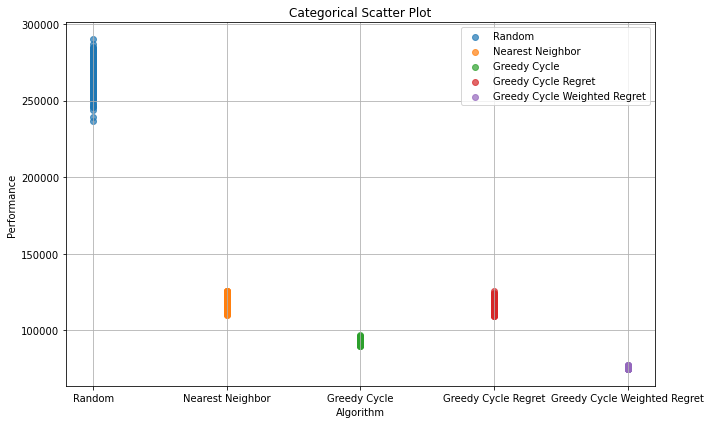

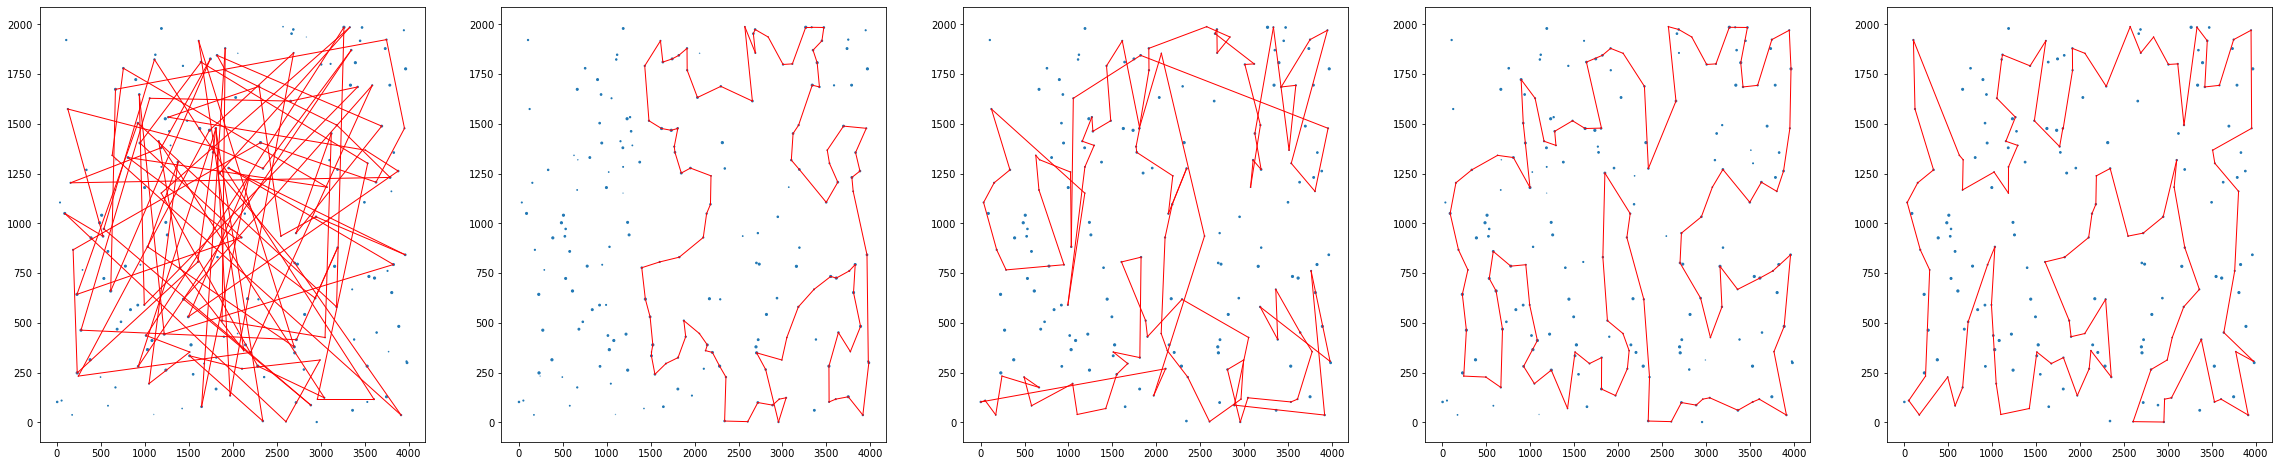

In [16]:
## Instance A
best_solutions, results_list = run_all_experiments(200, [lambda x: random_solution(tspa),
                         lambda x: nearest_neighbor(tspa, x),
                         lambda x: greedy_cycle(tspa, x),
                         lambda x: greedy_cycle_with_regret(tspa_np, x),
                         lambda x: greedy_cycle_with_weighted_regret(tspa_np, x)
                         ], 
                    lambda x: tspa.get_solution_cost(x),
                    ["Random", 
                     "Nearest Neighbor", 
                     "Greedy Cycle", 
                     "Greedy Cycle Regret", 
                     "Greedy Cycle Weighted Regret"])
tspa.plot(best_solutions)

# Instance B

Running Random
MIN 239845, AVG 265702.055, MAX 299886
Running Nearest Neighbor
MIN 109047, AVG 116413.93, MAX 124759
Running Greedy Cycle
MIN 79773, AVG 83124.28, MAX 87652
Running Greedy Cycle Regret
MIN 112088, AVG 119030.635, MAX 131087
Running Greedy Cycle Weighted Regret
MIN 67498, AVG 68827.875, MAX 70013


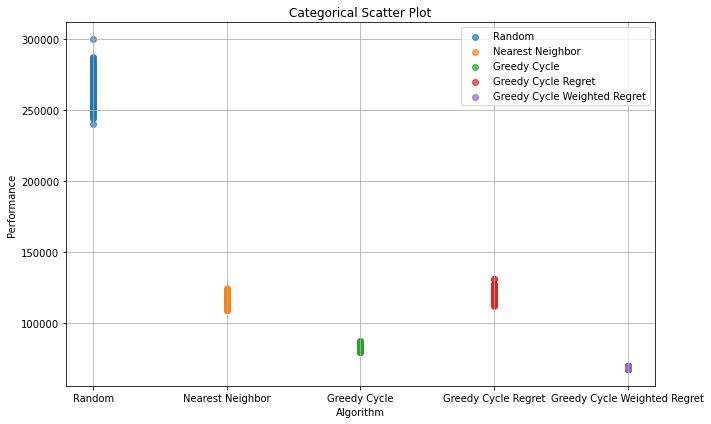

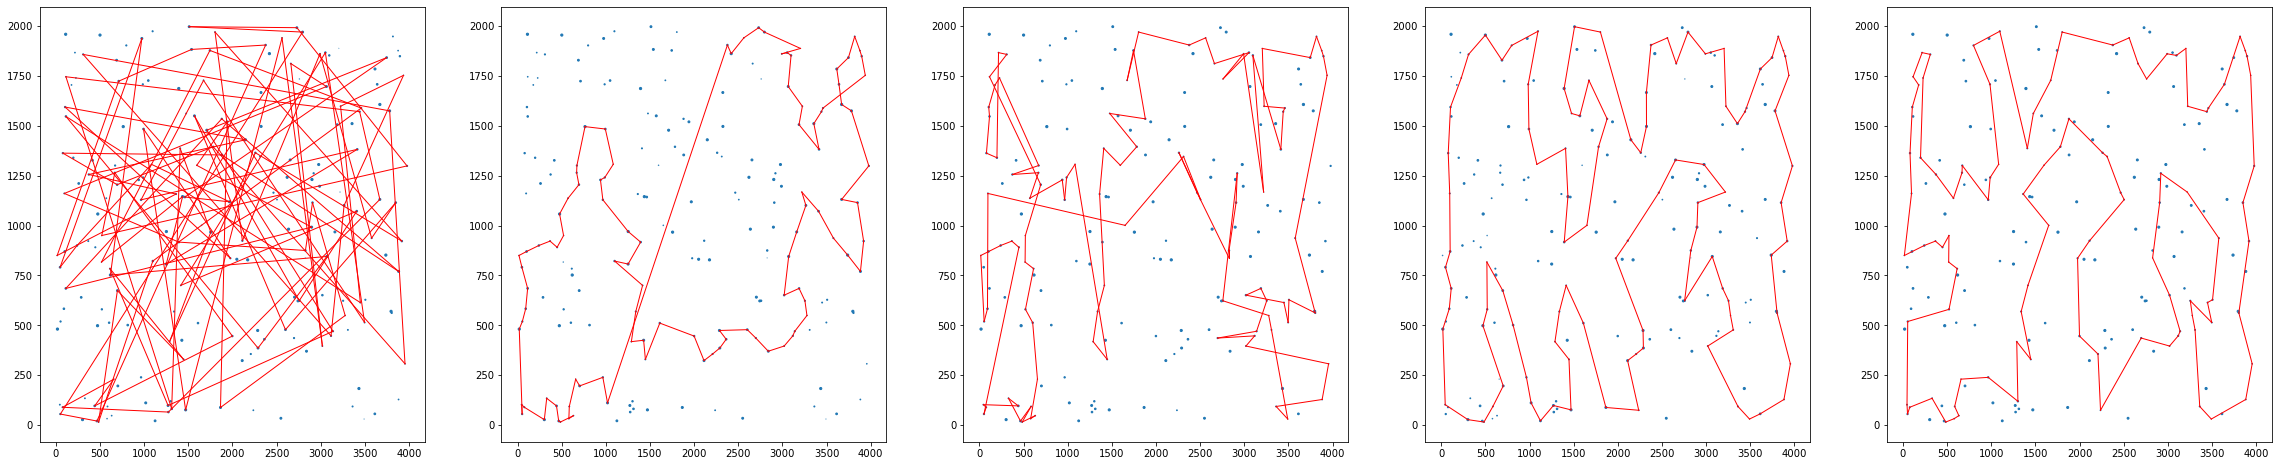

In [17]:
best_solutions, results_list = run_all_experiments(200, [lambda x: random_solution(tspb),
                         lambda x: nearest_neighbor(tspb, x),
                         lambda x: greedy_cycle(tspb, x),
                         lambda x: greedy_cycle_with_regret(tspb_np, x),
                         lambda x: greedy_cycle_with_weighted_regret(tspb_np, x)
                         ], 
                    lambda x: tspb.get_solution_cost(x),
                    ["Random", 
                     "Nearest Neighbor", 
                     "Greedy Cycle", 
                     "Greedy Cycle Regret", 
                     "Greedy Cycle Weighted Regret"])
tspb.plot(best_solutions)

# Instance C

Running Random
MIN 191455, AVG 214795.975, MAX 237507
Running Nearest Neighbor
MIN 62629, AVG 66329.945, MAX 71814
Running Greedy Cycle
MIN 62887, AVG 66757.14, MAX 71118
Running Greedy Cycle Regret
MIN 65095, AVG 69302.655, MAX 74385
Running Greedy Cycle Weighted Regret
MIN 49616, AVG 50591.935, MAX 51830


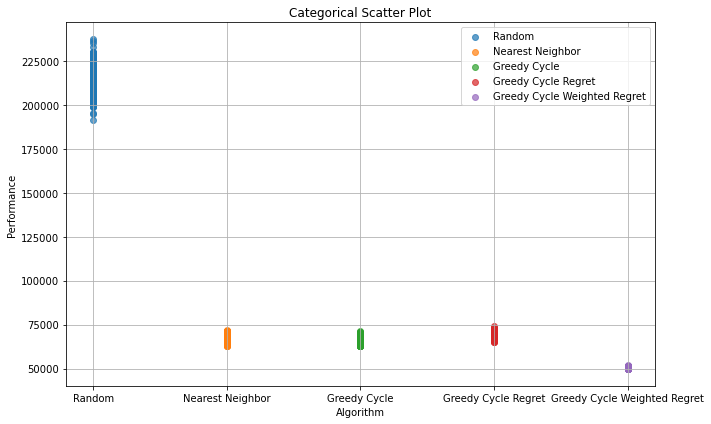

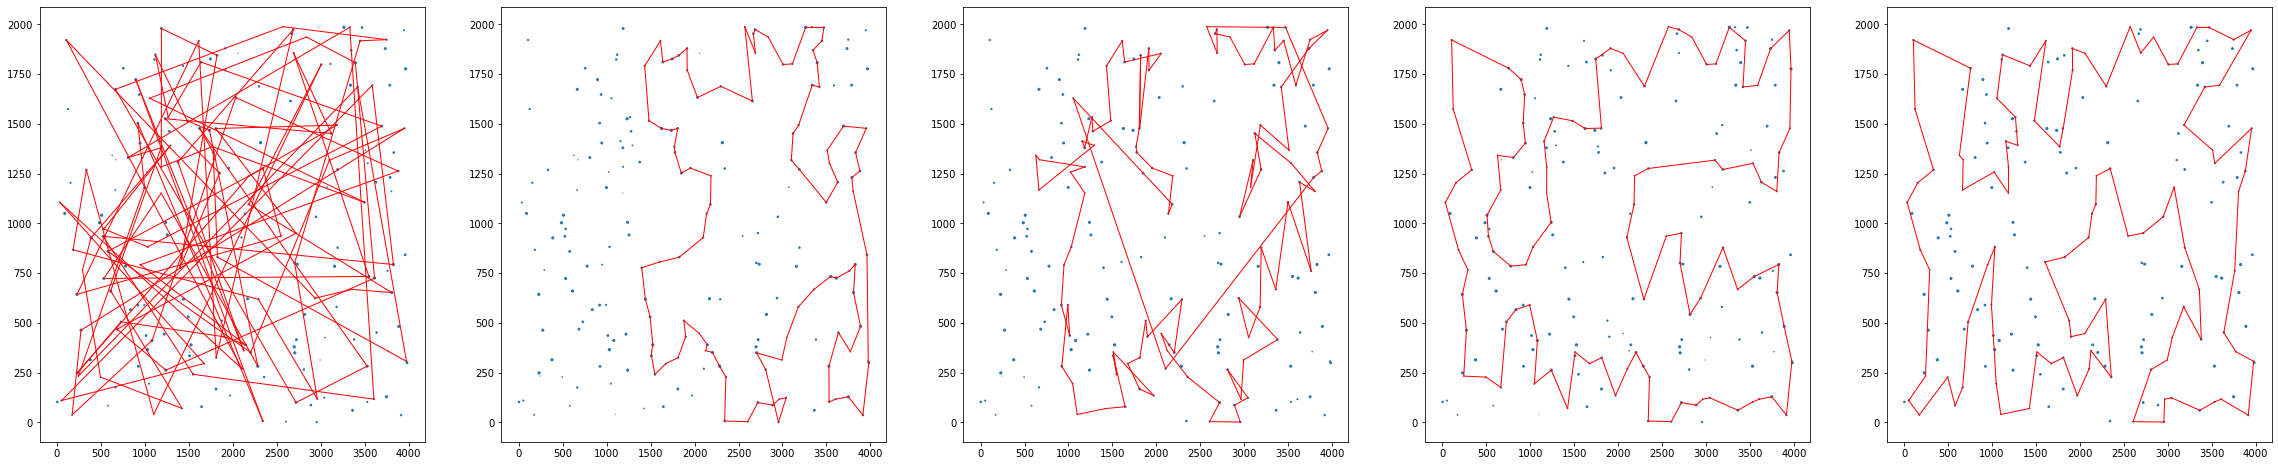

In [18]:
best_solutions, results_list = run_all_experiments(200, [lambda x: random_solution(tspc),
                         lambda x: nearest_neighbor(tspc, x),
                         lambda x: greedy_cycle(tspc, x),
                         lambda x: greedy_cycle_with_regret(tspc_np, x),
                         lambda x: greedy_cycle_with_weighted_regret(tspc_np, x)
                         ], 
                    lambda x: tspc.get_solution_cost(x),
                    ["Random", 
                     "Nearest Neighbor", 
                     "Greedy Cycle", 
                     "Greedy Cycle Regret", 
                     "Greedy Cycle Weighted Regret"])
tspc.plot(best_solutions)

# Instance D

Running Random
MIN 196786, AVG 218867.88, MAX 241394
Running Nearest Neighbor
MIN 62967, AVG 67119.2, MAX 71396
Running Greedy Cycle
MIN 56996, AVG 62641.62, MAX 69510
Running Greedy Cycle Regret
MIN 67174, AVG 70583.535, MAX 76747
Running Greedy Cycle Weighted Regret
MIN 44960, AVG 45697.065, MAX 47299


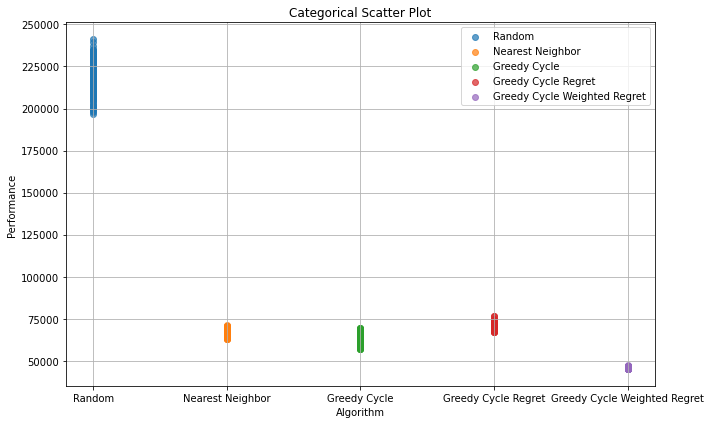

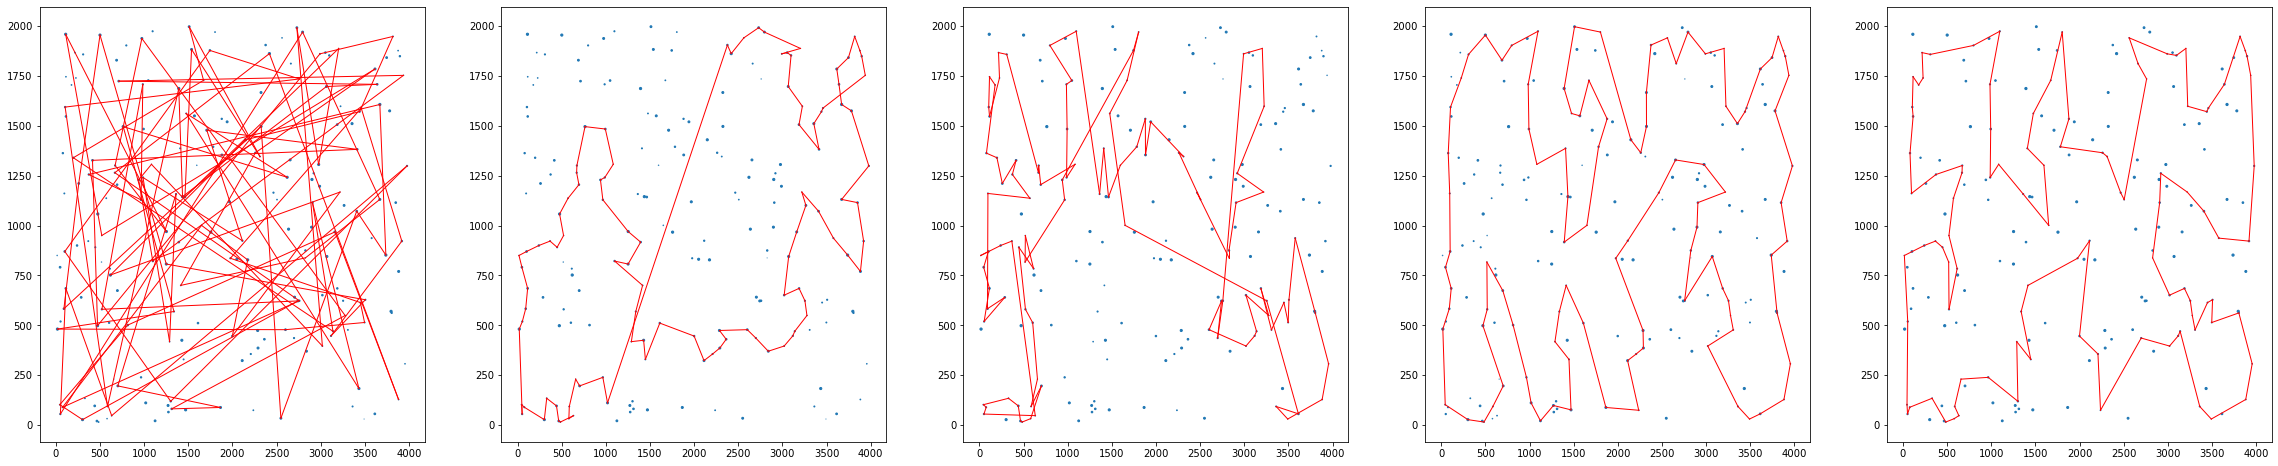

In [19]:
best_solutions, results_list = run_all_experiments(200, [lambda x: random_solution(tspd),
                         lambda x: nearest_neighbor(tspd, x),
                         lambda x: greedy_cycle(tspd, x),
                         lambda x: greedy_cycle_with_regret(tspd_np, x),
                         lambda x: greedy_cycle_with_weighted_regret(tspd_np, x)
                         ], 
                    lambda x: tspd.get_solution_cost(x),
                    ["Random", 
                     "Nearest Neighbor", 
                     "Greedy Cycle", 
                     "Greedy Cycle Regret", 
                     "Greedy Cycle Weighted Regret"])
tspd.plot(best_solutions)